#Building & Training a Neural Network



In [ ]:
!pip install tensorflow

In [125]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

##1) Load Dataset

In [126]:
import os

os.makedirs("results", exist_ok=True)


In [127]:
# 1) Load Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [128]:
# Normalize pixel values (0-255 -> 0-1)
x_train =x_train.astype("float32")/225.0
x_test= x_test.astype("float32")/225.0

## 2) Split Validation Set from Training Set

In [129]:
# Reserve last 5000 samples for validation
x_val =x_train[-5000:]
y_val =y_train[-5000:]
x_tr = x_train[:-5000]
y_tr = y_train[:-5000]


In [130]:
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)

Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


##3) Build Model

In [131]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##4) Compile Model

In [132]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

##5) Train with Validation Set ( 5 epochs)

In [133]:
history1= model.fit(
    x_tr,y_tr,
    epochs=5,
    batch_size=64,
    validation_data=(x_val,y_val)


)

Epoch 1/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8521 - loss: 0.5142 - val_accuracy: 0.9628 - val_loss: 0.1443
Epoch 2/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9560 - loss: 0.1512 - val_accuracy: 0.9706 - val_loss: 0.1029
Epoch 3/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9707 - loss: 0.1002 - val_accuracy: 0.9752 - val_loss: 0.0863
Epoch 4/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9785 - loss: 0.0735 - val_accuracy: 0.9714 - val_loss: 0.0940
Epoch 5/5
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9838 - loss: 0.0565 - val_accuracy: 0.9726 - val_loss: 0.0853


##6) Plot Training vs Validation Loss




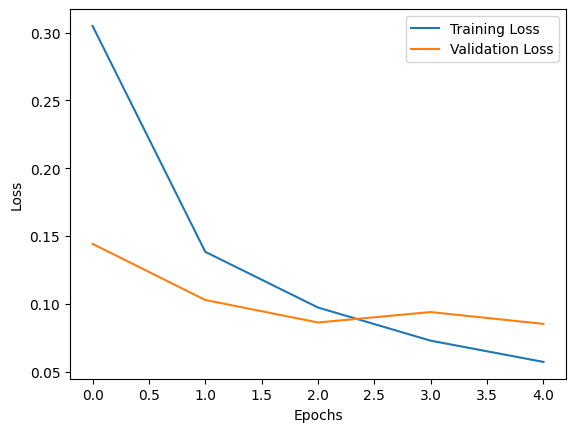

In [134]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##7) Evaluate on Test Set

In [135]:
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0890


[0.07791496068239212, 0.9768999814987183]

##8) Predict Example

In [136]:
sample = x_test[13].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[13])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Label: 0
True Label: 0


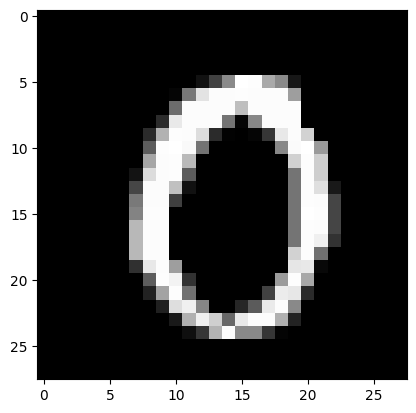

In [137]:
plt.imshow(x_test[13], cmap="gray")
plt.show()

#Tasks : Deep Learning Mastery


 ## 2) Custom Image Generalization Test

In [138]:
import matplotlib.pyplot as plt
import numpy as np

os.makedirs("results/task1_prediction_behavior", exist_ok=True)

samples = [0, 1, 2]
preds = model.predict(x_test[samples]).argmax(axis=1)

for i, idx in enumerate(samples):
    plt.imshow(x_test[idx], cmap="gray")
    plt.title(f"Predicted: {preds[i]} | True: {y_test[idx]}")
    plt.axis("off")
    plt.savefig(f"results/task1_prediction_behavior/sample_{i}.png")
    plt.close()

with open("results/task1_prediction_behavior/predictions.txt", "w") as f:
    for i in range(3):
        f.write(f"Sample {i}: Pred={preds[i]}, True={y_test[samples[i]]}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


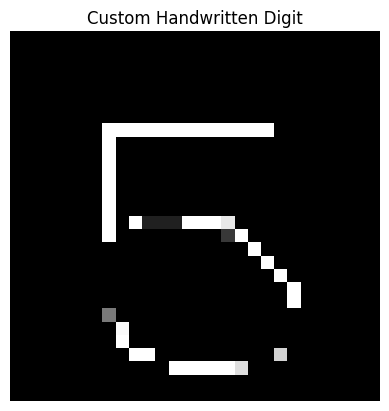

In [157]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("/content/Screenshot 2026-01-03 202516.png", cv2.IMREAD_GRAYSCALE)

# Resize to 28x28
img = cv2.resize(img, (28, 28))
# Normalize
img = img / 255.0

# Reshape for model
img = img.reshape(1, 28, 28, 1)

plt.imshow(img.reshape(28,28), cmap="gray")
plt.title("Custom Handwritten Digit")
plt.axis("off")
plt.show()

In [158]:
pred = model.predict(img.reshape(1, 28, 28))
pred_label = np.argmax(pred)

print("Predicted Label:", pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Label: 5


In [159]:
import os
os.makedirs("results/task2_custom_digit", exist_ok=True)

plt.imsave("results/task2_custom_digit/custom_digit.png",
           img.reshape(28,28), cmap="gray")

with open("results/task2_custom_digit/prediction.txt", "w") as f:
    f.write(f"Predicted Label: {pred_label}")


##  3)Epoch-Based Learning Curve Exploration

## Train on 10 epochs

In [14]:
model2= keras.models.clone_model(model)

In [15]:
model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

In [16]:
history2= model2.fit(
    x_tr,y_tr,
    epochs=10,
    batch_size=64,
    validation_data=(x_val,y_val))

Epoch 1/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8529 - loss: 0.5254 - val_accuracy: 0.9632 - val_loss: 0.1370
Epoch 2/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9580 - loss: 0.1542 - val_accuracy: 0.9658 - val_loss: 0.1146
Epoch 3/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9712 - loss: 0.0993 - val_accuracy: 0.9740 - val_loss: 0.0872
Epoch 4/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9800 - loss: 0.0718 - val_accuracy: 0.9794 - val_loss: 0.0774
Epoch 5/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9829 - loss: 0.0579 - val_accuracy: 0.9776 - val_loss: 0.0810
Epoch 6/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9868 - loss: 0.0446 - val_accuracy: 0.9786 - val_loss: 0.0791
Epoch 7/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9893 - loss: 0.0363 - val_accuracy: 0.9760 - val_loss: 0.0852
Epoch 8/10
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0291 - val_accuracy: 0.

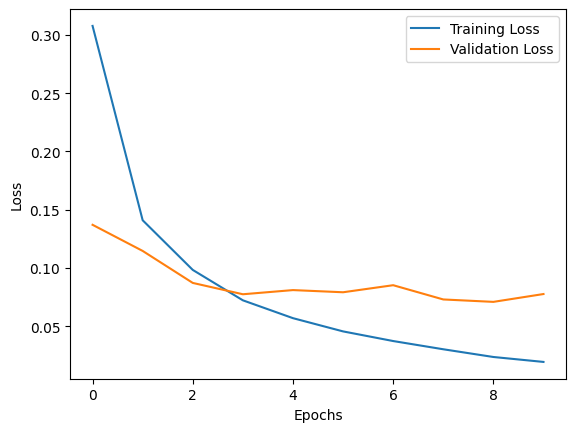

In [17]:
#6) Plot Training vs Validation Loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Train on 20 epochs

In [18]:
model3= keras.models.clone_model(model)

In [19]:
model3.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

In [20]:
history3= model3.fit(
    x_tr,y_tr,
    epochs=20,
    batch_size=64,
    validation_data=(x_val,y_val))

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8572 - loss: 0.5180 - val_accuracy: 0.9636 - val_loss: 0.1332
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9555 - loss: 0.1516 - val_accuracy: 0.9742 - val_loss: 0.1017
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9710 - loss: 0.1017 - val_accuracy: 0.9728 - val_loss: 0.0985
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9781 - loss: 0.0743 - val_accuracy: 0.9768 - val_loss: 0.0851
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9838 - loss: 0.0566 - val_accuracy: 0.9788 - val_loss: 0.0762
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9865 - loss: 0.0467 - val_accuracy: 0.9792 - val_loss: 0.0781
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0370 - val_accuracy: 0.9776 - val_loss: 0.0772
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9917 - loss: 0.0299 - val_accuracy: 0.

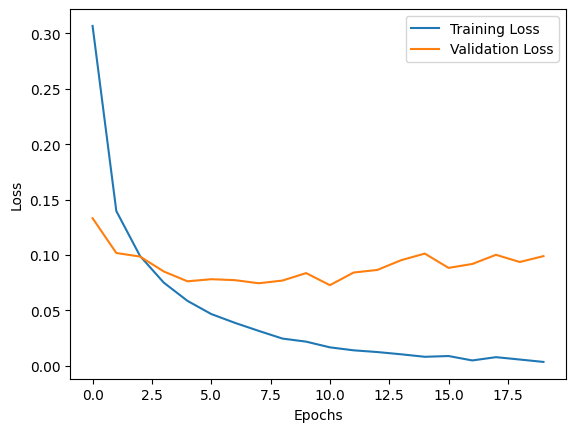

In [21]:
#6) Plot Training vs Validation Loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
def save_curves(history, name):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(["Train", "Val"])
    plt.savefig(f"results/task3_epochs/{name}.png")
    plt.close()

os.makedirs("results/task3_epochs", exist_ok=True)

save_curves(history1, "epochs_5")
save_curves(history2, "epochs_10")
save_curves(history3, "epochs_20")


## 4) EarlyStopping Behavior Analysis

In [24]:
#EarlyStopping Behavior Analysis(5 epochs)
model4= keras.models.clone_model(model)
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]
model4.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history1_early = model4.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8767 - loss: 0.4326 - val_accuracy: 0.9652 - val_loss: 0.1208
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9633 - loss: 0.1231 - val_accuracy: 0.9722 - val_loss: 0.0899
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9771 - loss: 0.0775 - val_accuracy: 0.9788 - val_loss: 0.0759
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9831 - loss: 0.0580 - val_accuracy: 0.9794 - val_loss: 0.0703
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0439 - val_accuracy: 0.9748 - val_loss: 0.0928


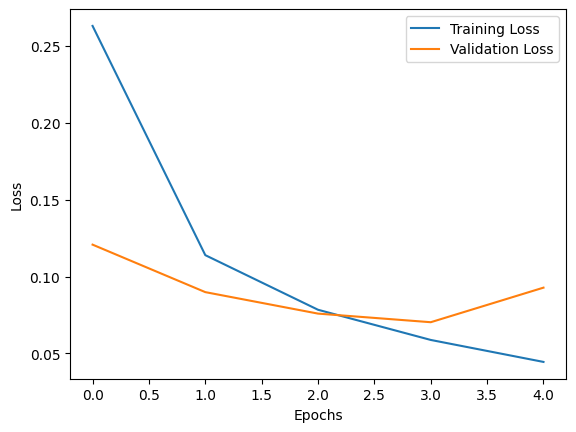

In [25]:
#6) Plot Training vs Validation Loss
plt.plot(history1_early.history['loss'], label='Training Loss')
plt.plot(history1_early.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
#EarlyStopping Behavior Analysis(10 epochs)
model5= keras.models.clone_model(model)
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]
model5.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history2_early = model5.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8768 - loss: 0.4378 - val_accuracy: 0.9676 - val_loss: 0.1209
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9651 - loss: 0.1202 - val_accuracy: 0.9756 - val_loss: 0.0890
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9752 - loss: 0.0796 - val_accuracy: 0.9768 - val_loss: 0.0810
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9829 - loss: 0.0555 - val_accuracy: 0.9756 - val_loss: 0.0822
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0435 - val_accuracy: 0.9758 - val_loss: 0.0815
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0328 - val_accuracy: 0.9742 - val_loss: 0.0843


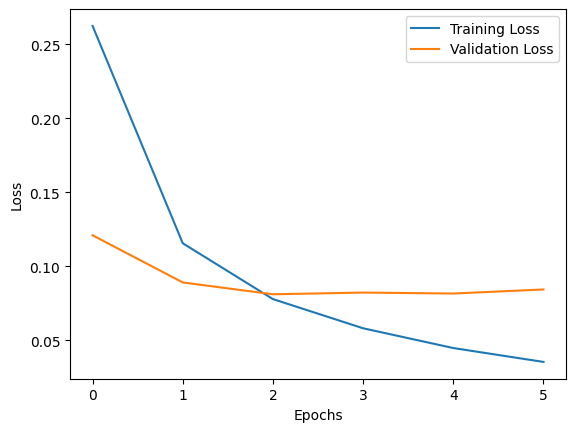

In [27]:
#6) Plot Training vs Validation Loss
plt.plot(history2_early.history['loss'], label='Training Loss')
plt.plot(history2_early.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
#EarlyStopping Behavior Analysis(20 epochs)
model6= keras.models.clone_model(model)
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]
model6.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history3_early = model6.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8748 - loss: 0.4382 - val_accuracy: 0.9696 - val_loss: 0.1155
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1201 - val_accuracy: 0.9766 - val_loss: 0.0880
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9783 - loss: 0.0778 - val_accuracy: 0.9774 - val_loss: 0.0803
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9821 - loss: 0.0574 - val_accuracy: 0.9778 - val_loss: 0.0776
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0412 - val_accuracy: 0.9774 - val_loss: 0.0798
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0347 - val_accuracy: 0.9788 - val_loss: 0.0840
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9920 - loss: 0.0274 - val_accuracy: 0.9796 - val_loss: 0.0798


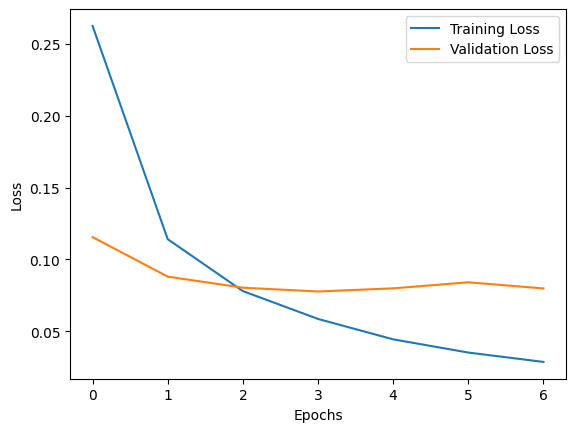

In [29]:
#6) Plot Training vs Validation Loss
plt.plot(history3_early.history['loss'], label='Training Loss')
plt.plot(history3_early.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# try increasing the patience (patience =5)
#EarlyStopping Behavior Analysis(5 epochs)
model7= keras.models.clone_model(model)
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]
model7.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history4_early = model7.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8723 - loss: 0.4420 - val_accuracy: 0.9650 - val_loss: 0.1200
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9636 - loss: 0.1220 - val_accuracy: 0.9756 - val_loss: 0.0959
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9761 - loss: 0.0813 - val_accuracy: 0.9744 - val_loss: 0.0876
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9832 - loss: 0.0565 - val_accuracy: 0.9788 - val_loss: 0.0706
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0431 - val_accuracy: 0.9774 - val_loss: 0.0777


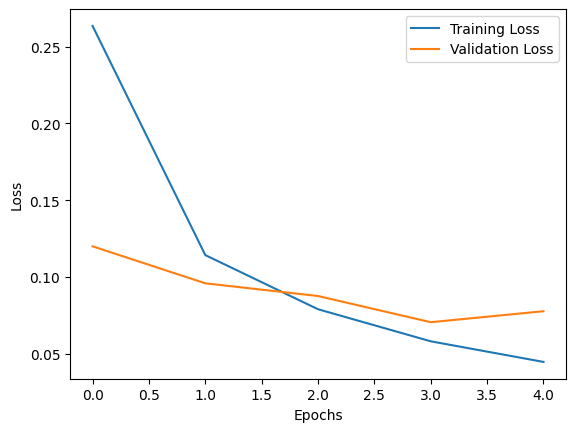

In [31]:
#6) Plot Training vs Validation Loss
plt.plot(history4_early.history['loss'], label='Training Loss')
plt.plot(history4_early.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
# try increasing the patience (patience =5)
#EarlyStopping Behavior Analysis(10 epochs)
model8= keras.models.clone_model(model)
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]
model8.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history5_early = model8.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8756 - loss: 0.4357 - val_accuracy: 0.9682 - val_loss: 0.1155
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9643 - loss: 0.1232 - val_accuracy: 0.9766 - val_loss: 0.0853
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9761 - loss: 0.0798 - val_accuracy: 0.9776 - val_loss: 0.0782
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.9776 - val_loss: 0.0804
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0413 - val_accuracy: 0.9792 - val_loss: 0.0748
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0315 - val_accuracy: 0.9782 - val_loss: 0.0791
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9925 - loss: 0.0262 - val_accuracy: 0.9798 - val_loss: 0.0775
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0208 - 

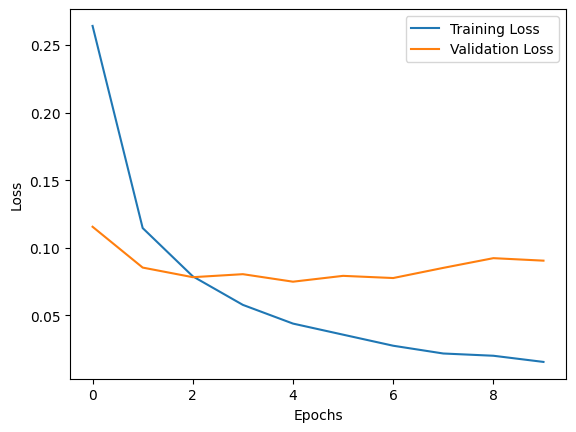

In [33]:
#6) Plot Training vs Validation Loss
plt.plot(history5_early.history['loss'], label='Training Loss')
plt.plot(history5_early.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [34]:
# try increasing the patience (patience =5)
#EarlyStopping Behavior Analysis(20 epochs)
model9= keras.models.clone_model(model)
callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]
model9.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history6_early = model9.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8755 - loss: 0.4339 - val_accuracy: 0.9672 - val_loss: 0.1220
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9639 - loss: 0.1216 - val_accuracy: 0.9730 - val_loss: 0.0919
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0803 - val_accuracy: 0.9764 - val_loss: 0.0857
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9827 - loss: 0.0568 - val_accuracy: 0.9794 - val_loss: 0.0767
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0429 - val_accuracy: 0.9750 - val_loss: 0.0950
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9891 - loss: 0.0333 - val_accuracy: 0.9776 - val_loss: 0.0886
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9923 - loss: 0.0258 - val_accuracy: 0.9784 - val_loss: 0.0858
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9932 - loss: 0.0228 -

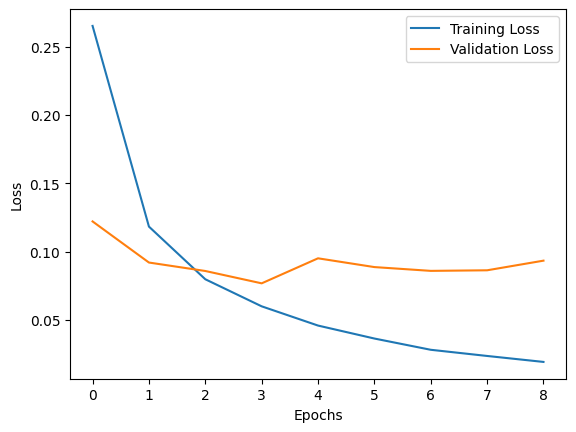

In [35]:
#6) Plot Training vs Validation Loss
plt.plot(history6_early.history['loss'], label='Training Loss')
plt.plot(history6_early.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Trying using different optmizer (SGD)

In [39]:
model10= keras.models.clone_model(model)
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

In [40]:
model10.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [41]:
history7_early = model10.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7409 - loss: 0.9788 - val_accuracy: 0.9222 - val_loss: 0.2937
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9031 - loss: 0.3479 - val_accuracy: 0.9364 - val_loss: 0.2344
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9188 - loss: 0.2895 - val_accuracy: 0.9430 - val_loss: 0.2081
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9288 - loss: 0.2549 - val_accuracy: 0.9480 - val_loss: 0.1888
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9347 - loss: 0.2365 - val_accuracy: 0.9548 - val_loss: 0.1714


In [42]:
# using 10 epochs
model11= keras.models.clone_model(model)


In [43]:
model11.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [44]:
history8_early = model11.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7334 - loss: 1.0028 - val_accuracy: 0.9214 - val_loss: 0.2950
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9036 - loss: 0.3463 - val_accuracy: 0.9354 - val_loss: 0.2371
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9186 - loss: 0.2919 - val_accuracy: 0.9442 - val_loss: 0.2080
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9296 - loss: 0.2554 - val_accuracy: 0.9488 - val_loss: 0.1897
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9338 - loss: 0.2397 - val_accuracy: 0.9544 - val_loss: 0.1739
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9399 - loss: 0.2144 - val_accuracy: 0.9586 - val_loss: 0.1616
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9447 - loss: 0.1982 - val_accuracy: 0.9596 - val_loss: 0.1542
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9509 - loss: 0.1820 - 

In [45]:
# using 20 epochs
model12= keras.models.clone_model(model)


In [46]:
model12.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],)

In [47]:
history9_early = model12.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7363 - loss: 1.0110 - val_accuracy: 0.9238 - val_loss: 0.2942
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9037 - loss: 0.3467 - val_accuracy: 0.9346 - val_loss: 0.2347
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9155 - loss: 0.2932 - val_accuracy: 0.9440 - val_loss: 0.2064
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9280 - loss: 0.2512 - val_accuracy: 0.9504 - val_loss: 0.1872
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9359 - loss: 0.2275 - val_accuracy: 0.9522 - val_loss: 0.1725
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9401 - loss: 0.2096 - val_accuracy: 0.9568 - val_loss: 0.1609
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9450 - loss: 0.1965 - val_accuracy: 0.9618 - val_loss: 0.1504
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9481 - loss: 0.1821 - 

## 5) Regularization & Optimization

In [48]:
model_d=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model_d.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]

)

In [50]:
history_d = model_d.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),

)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8619 - loss: 0.4797 - val_accuracy: 0.9658 - val_loss: 0.1146
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9563 - loss: 0.1425 - val_accuracy: 0.9744 - val_loss: 0.0917
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9716 - loss: 0.0940 - val_accuracy: 0.9766 - val_loss: 0.0835
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9775 - loss: 0.0724 - val_accuracy: 0.9796 - val_loss: 0.0790
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9804 - val_loss: 0.0704


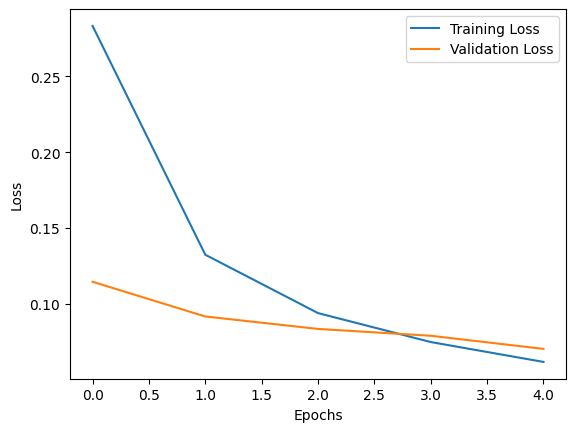

In [51]:
#Plot Training vs Validation Loss
plt.plot(history_d.history['loss'], label='Training Loss')
plt.plot(history_d.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [52]:
os.makedirs("results/task5_dropout", exist_ok=True)

plt.plot(history_d.history['loss'])
plt.plot(history_d.history['val_loss'])
plt.savefig("results/task5_dropout/dropout_0.1.png")
plt.close()


In [53]:
#Drop out (0.3)
model_d2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model_d2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [55]:
history_d2 = model_d2.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),

)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8423 - loss: 0.5245 - val_accuracy: 0.9670 - val_loss: 0.1186
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9477 - loss: 0.1759 - val_accuracy: 0.9742 - val_loss: 0.0994
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9588 - loss: 0.1373 - val_accuracy: 0.9778 - val_loss: 0.0819
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9669 - loss: 0.1108 - val_accuracy: 0.9768 - val_loss: 0.0771
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9712 - loss: 0.0911 - val_accuracy: 0.9784 - val_loss: 0.0789


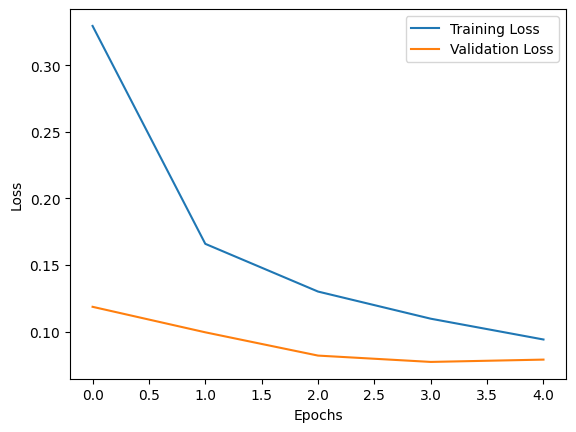

In [56]:
#Plot Training vs Validation Loss
plt.plot(history_d2.history['loss'], label='Training Loss')
plt.plot(history_d2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
os.makedirs("results/task5_dropout", exist_ok=True)

plt.plot(history_d2.history['loss'])
plt.plot(history_d2.history['val_loss'])
plt.savefig("results/task5_dropout/dropout_0.3.png")
plt.close()


## 6) L2 Regularization Experiment




In [58]:
#L2 Regularization Experiment(0.0001)
model_reg=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(10,activation="softmax")
])

In [59]:
model_reg.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [60]:
history_reg = model_reg.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),

)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8789 - loss: 0.4535 - val_accuracy: 0.9668 - val_loss: 0.1520
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9624 - loss: 0.1537 - val_accuracy: 0.9728 - val_loss: 0.1262
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9748 - loss: 0.1153 - val_accuracy: 0.9782 - val_loss: 0.1072
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0981 - val_accuracy: 0.9782 - val_loss: 0.1093
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0855 - val_accuracy: 0.9782 - val_loss: 0.1094


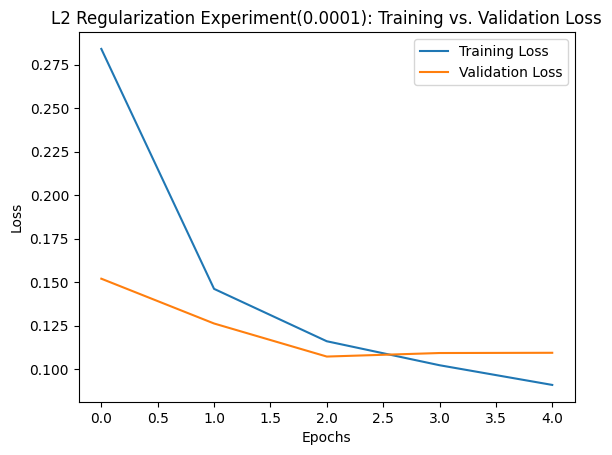

In [61]:
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('L2 Regularization Experiment(0.0001): Training vs. Validation Loss')
plt.legend()
plt.show()

In [62]:
os.makedirs("results/task6_l2", exist_ok=True)

plt.plot(history_reg.history['val_loss'])
plt.savefig("results/task6_l2/l2_0.001.png")
plt.close()


In [63]:
#L2 Regularization Experiment(0.001)
model_reg1=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10,activation="softmax")])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model_reg1.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [65]:
history_reg1 = model_reg1.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8720 - loss: 0.5733 - val_accuracy: 0.9572 - val_loss: 0.2356
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9551 - loss: 0.2381 - val_accuracy: 0.9694 - val_loss: 0.1894
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9648 - loss: 0.2050 - val_accuracy: 0.9694 - val_loss: 0.1791
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9697 - loss: 0.1811 - val_accuracy: 0.9776 - val_loss: 0.1664
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9716 - loss: 0.1722 - val_accuracy: 0.9714 - val_loss: 0.1740


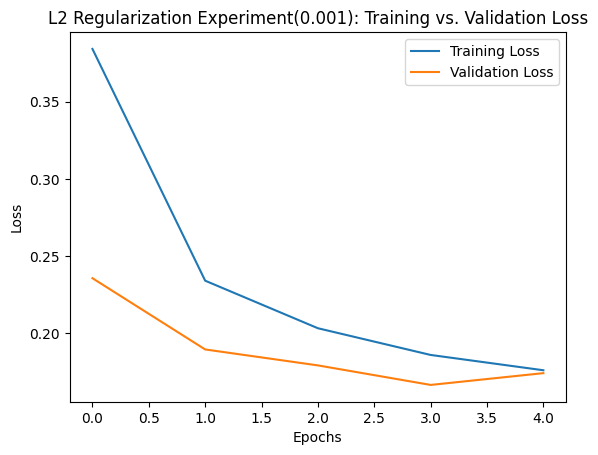

In [66]:
plt.plot(history_reg1.history['loss'], label='Training Loss')
plt.plot(history_reg1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('L2 Regularization Experiment(0.001): Training vs. Validation Loss')
plt.legend()
plt.show()

In [72]:
os.makedirs("results/task6_l2", exist_ok=True)

plt.plot(history_reg1.history['val_loss'])
plt.savefig("results/task6_l2/l2_0.001.png")
plt.close()

In [68]:
#L2 Regularization Experiment(0.01)
model_reg2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10,activation="softmax")])

In [69]:
model_reg2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [70]:
history_reg2 = model_reg2.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8574 - loss: 0.9911 - val_accuracy: 0.9420 - val_loss: 0.3762
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9262 - loss: 0.4094 - val_accuracy: 0.9538 - val_loss: 0.3343
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9372 - loss: 0.3678 - val_accuracy: 0.9622 - val_loss: 0.2892
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9413 - loss: 0.3385 - val_accuracy: 0.9644 - val_loss: 0.2787
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9456 - loss: 0.3242 - val_accuracy: 0.9612 - val_loss: 0.2690


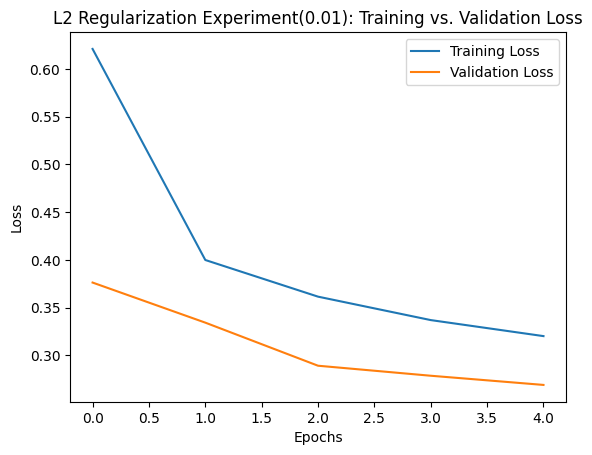

In [71]:
plt.plot(history_reg2.history['loss'], label='Training Loss')
plt.plot(history_reg2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('L2 Regularization Experiment(0.01): Training vs. Validation Loss')
plt.legend()
plt.show()

In [73]:
os.makedirs("results/task6_l2", exist_ok=True)

plt.plot(history_reg2.history['val_loss'])
plt.savefig("results/task6_l2/l2_0.01.png")
plt.close()

## 7) Optimizer Comparison Challenge

In [74]:
#model 1 using SGD (learning_rate=0.01)
model_op=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [75]:
from keras.optimizers import SGD

model_op.compile(
    optimizer=SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [76]:
history_op = model_op.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7302 - loss: 1.0254 - val_accuracy: 0.9276 - val_loss: 0.2878
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9048 - loss: 0.3475 - val_accuracy: 0.9420 - val_loss: 0.2319
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9169 - loss: 0.2936 - val_accuracy: 0.9474 - val_loss: 0.2036
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9284 - loss: 0.2523 - val_accuracy: 0.9516 - val_loss: 0.1858
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9332 - loss: 0.2342 - val_accuracy: 0.9564 - val_loss: 0.1707


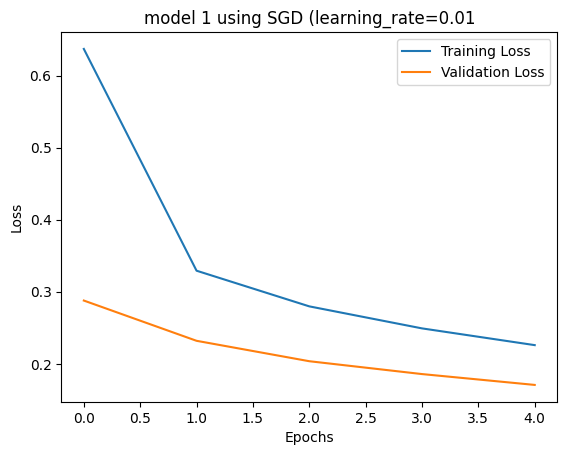

In [77]:
plt.plot(history_op.history['loss'], label='Training Loss')
plt.plot(history_op.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("model 1 using SGD (learning_rate=0.01")
plt.legend()
plt.show()

In [78]:
os.makedirs("results/task7_optimizers", exist_ok=True)

plt.plot(history_op.history['accuracy'])
plt.plot(history_op.history['val_accuracy'])
plt.savefig("results/task7_optimizers/SGD.png")
plt.close()


In [79]:
# Train with SGD with Momentum (learning_rate=0.01, momentum=0.9)
model_op_momentum = keras.models.clone_model(model_op)
from keras.optimizers import SGD

model_op_momentum.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [80]:
history_op_momentum = model_op_momentum.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8558 - loss: 0.4924 - val_accuracy: 0.9620 - val_loss: 0.1391
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9559 - loss: 0.1522 - val_accuracy: 0.9704 - val_loss: 0.1002
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9705 - loss: 0.1022 - val_accuracy: 0.9776 - val_loss: 0.0829
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0789 - val_accuracy: 0.9778 - val_loss: 0.0811
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9807 - loss: 0.0644 - val_accuracy: 0.9804 - val_loss: 0.0723


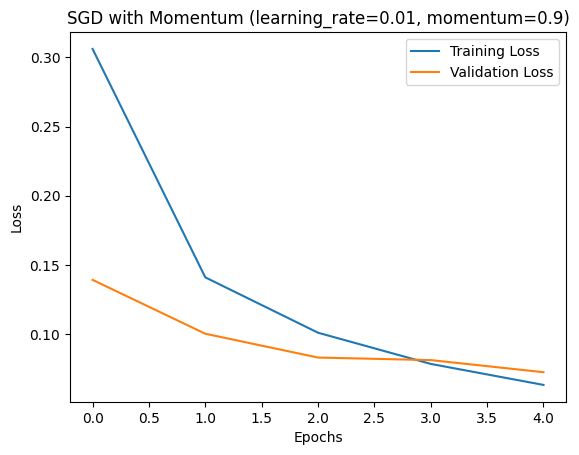

In [81]:
plt.plot(history_op_momentum.history['loss'], label='Training Loss')
plt.plot(history_op_momentum.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("SGD with Momentum (learning_rate=0.01, momentum=0.9)")
plt.legend()
plt.show()

In [82]:
os.makedirs("results/task7_optimizers", exist_ok=True)

plt.plot(history_op_momentum.history['accuracy'])
plt.plot(history_op_momentum.history['val_accuracy'])
plt.savefig("results/task7_optimizers/SGD with Momentum.png")
plt.close()


In [83]:
#Train with AdamW Optimizer
model_adamw = keras.models.clone_model(model_op)
from keras.optimizers import AdamW

model_adamw.compile(
    optimizer="AdamW",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [84]:
history_adamw = model_adamw.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8761 - loss: 0.4398 - val_accuracy: 0.9648 - val_loss: 0.1145
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9645 - loss: 0.1198 - val_accuracy: 0.9730 - val_loss: 0.0904
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9781 - loss: 0.0767 - val_accuracy: 0.9776 - val_loss: 0.0757
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9834 - loss: 0.0565 - val_accuracy: 0.9792 - val_loss: 0.0725
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9780 - val_loss: 0.0760


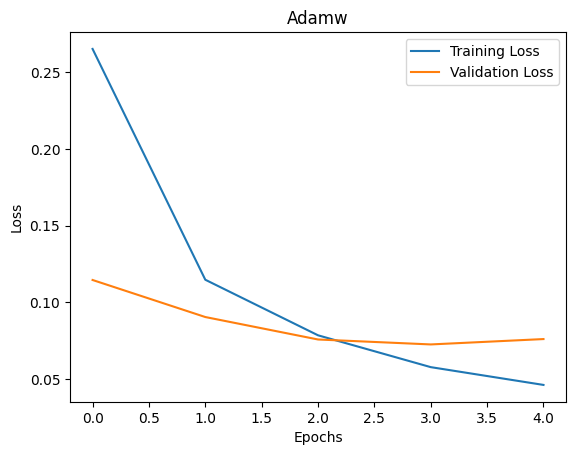

In [85]:
plt.plot(history_adamw.history['loss'], label='Training Loss')
plt.plot(history_adamw.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Adamw")
plt.legend()
plt.show()

In [86]:
os.makedirs("results/task7_optimizers", exist_ok=True)

plt.plot(history_adamw.history['accuracy'])
plt.plot(history_adamw.history['val_accuracy'])
plt.savefig("results/task7_optimizers/adamw.png")
plt.close()


## 8) Batch Size & Gradient Noise Experiment

In [87]:
model_b=keras.models.clone_model(model_op)
model_b.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [88]:
#batch size =8
history_b= model_b.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=8,
    validation_data=(x_val, y_val),
)

Epoch 1/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8942 - loss: 0.3623 - val_accuracy: 0.9644 - val_loss: 0.1159
Epoch 2/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9695 - loss: 0.1020 - val_accuracy: 0.9704 - val_loss: 0.1013
Epoch 3/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9789 - loss: 0.0662 - val_accuracy: 0.9752 - val_loss: 0.0873
Epoch 4/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9839 - loss: 0.0508 - val_accuracy: 0.9736 - val_loss: 0.0962
Epoch 5/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9864 - loss: 0.0393 - val_accuracy: 0.9802 - val_loss: 0.0752


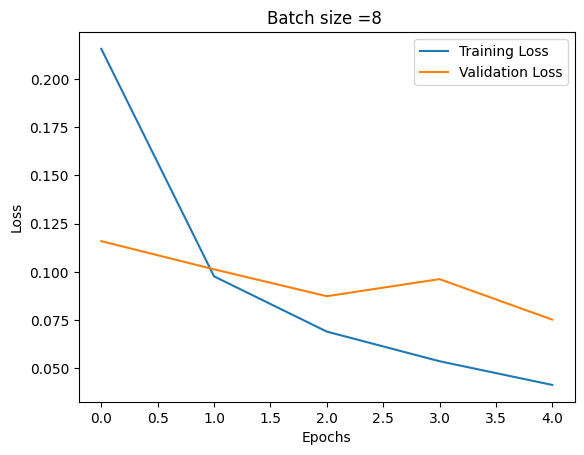

In [89]:
plt.plot(history_b.history['loss'], label='Training Loss')
plt.plot(history_b.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Batch size =8 ")
plt.legend()
plt.show()

In [90]:
os.makedirs("results/task8_batch_size", exist_ok=True)

plt.plot(history_b.history['loss'])
plt.savefig("results/task8_batch_size/batch_8.png")
plt.close()


In [91]:
#batch size = 32
model_b1=keras.models.clone_model(model_op)
model_b1.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [92]:
history_b1= model_b1.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8746 - loss: 0.4363 - val_accuracy: 0.9712 - val_loss: 0.1137
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9631 - loss: 0.1236 - val_accuracy: 0.9730 - val_loss: 0.0950
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9764 - loss: 0.0777 - val_accuracy: 0.9764 - val_loss: 0.0845
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9827 - loss: 0.0577 - val_accuracy: 0.9800 - val_loss: 0.0810
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9877 - loss: 0.0418 - val_accuracy: 0.9780 - val_loss: 0.0869


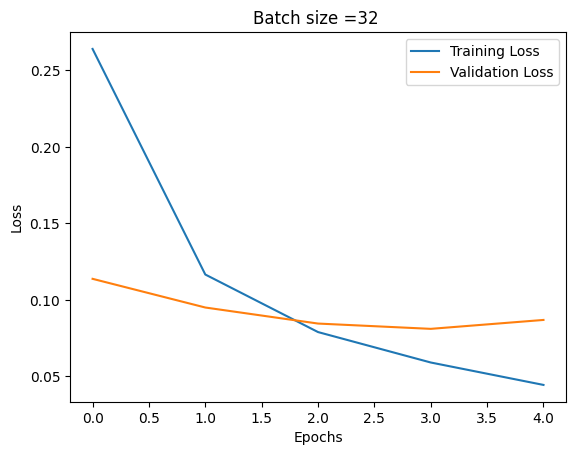

In [93]:
plt.plot(history_b1.history['loss'], label='Training Loss')
plt.plot(history_b1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Batch size =32 ")
plt.legend()
plt.show()

In [94]:
os.makedirs("results/task8_batch_size", exist_ok=True)

plt.plot(history_b1.history['loss'])
plt.savefig("results/task8_batch_size/batch_32.png")
plt.close()


In [95]:
model_b2=keras.models.clone_model(model_op)
model_b2.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [96]:
#batch size =8
history_b2= model_b2.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=132,
    validation_data=(x_val, y_val),
)

Epoch 1/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8205 - loss: 0.6362 - val_accuracy: 0.9584 - val_loss: 0.1574
Epoch 2/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9463 - loss: 0.1849 - val_accuracy: 0.9660 - val_loss: 0.1213
Epoch 3/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9650 - loss: 0.1247 - val_accuracy: 0.9730 - val_loss: 0.1010
Epoch 4/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9722 - loss: 0.0940 - val_accuracy: 0.9736 - val_loss: 0.0911
Epoch 5/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9800 - loss: 0.0730 - val_accuracy: 0.9734 - val_loss: 0.0939


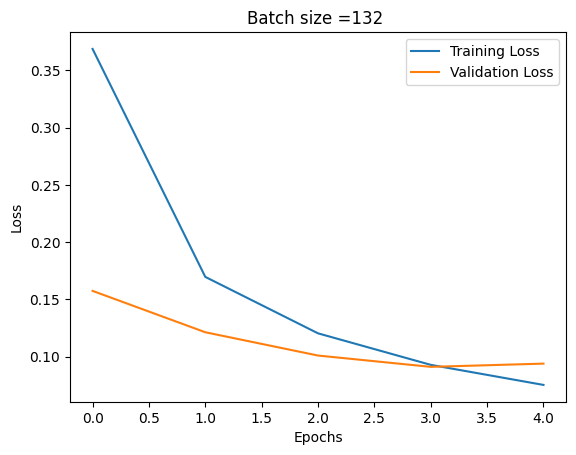

In [97]:
plt.plot(history_b2.history['loss'], label='Training Loss')
plt.plot(history_b2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Batch size =132 ")
plt.legend()
plt.show()

In [98]:
os.makedirs("results/task8_batch_size", exist_ok=True)

plt.plot(history_b2.history['loss'])
plt.savefig("results/task8_batch_size/batch_132.png")
plt.close()


##9) Activation Function Swap (ReLU vs Tanh vs GELU)

In [99]:
#using Tanh
import tensorflow as tf

model_act = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model_act.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [101]:
history_act= model_act.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=132,
    validation_data=(x_val, y_val),
)

Epoch 1/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8225 - loss: 0.6145 - val_accuracy: 0.9508 - val_loss: 0.1835
Epoch 2/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9388 - loss: 0.2114 - val_accuracy: 0.9614 - val_loss: 0.1397
Epoch 3/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9564 - loss: 0.1522 - val_accuracy: 0.9696 - val_loss: 0.1114
Epoch 4/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9664 - loss: 0.1146 - val_accuracy: 0.9722 - val_loss: 0.0998
Epoch 5/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9754 - loss: 0.0897 - val_accuracy: 0.9744 - val_loss: 0.0893


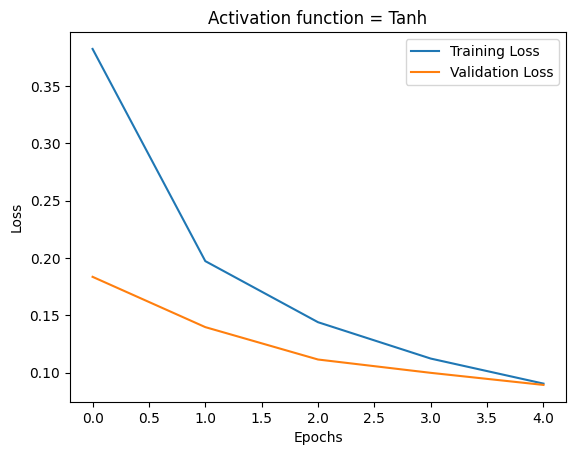

In [102]:
plt.plot(history_act.history['loss'], label='Training Loss')
plt.plot(history_act.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Activation function = Tanh")
plt.legend()
plt.show()

In [103]:
os.makedirs("results/task9_activations", exist_ok=True)

plt.plot(history_act.history['val_loss'])
plt.savefig("results/task9_activations/tanh.png")
plt.close()


In [104]:
#using softsign
import tensorflow as tf

model_act2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='softsign'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [105]:
model_act2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [106]:
history_act2= model_act2.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=132,
    validation_data=(x_val, y_val),
)

Epoch 1/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8175 - loss: 0.6743 - val_accuracy: 0.9456 - val_loss: 0.2071
Epoch 2/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9354 - loss: 0.2289 - val_accuracy: 0.9592 - val_loss: 0.1504
Epoch 3/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9486 - loss: 0.1777 - val_accuracy: 0.9644 - val_loss: 0.1324
Epoch 4/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9602 - loss: 0.1404 - val_accuracy: 0.9678 - val_loss: 0.1151
Epoch 5/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9681 - loss: 0.1126 - val_accuracy: 0.9710 - val_loss: 0.1047


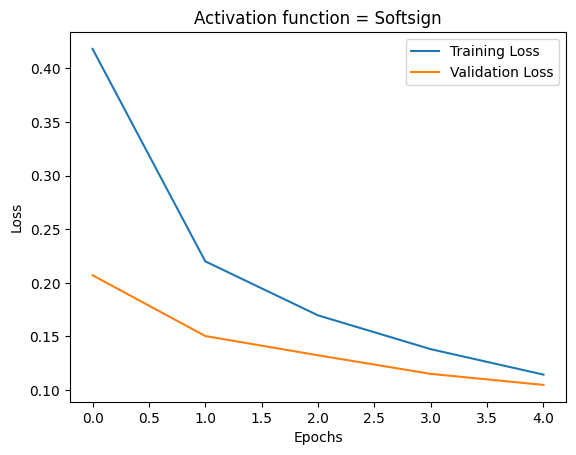

In [107]:
plt.plot(history_act2.history['loss'], label='Training Loss')
plt.plot(history_act2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Activation function = Softsign")
plt.legend()
plt.show()

In [108]:
os.makedirs("results/task9_activations", exist_ok=True)

plt.plot(history_act2.history['val_loss'])
plt.savefig("results/task9_activations/softsign.png")
plt.close()


In [109]:
model_act3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.gelu),
    tf.keras.layers.Dense(10, activation='softmax')])

In [110]:
model_act3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [111]:
history_act3= model_act3.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=132,
    validation_data=(x_val, y_val),
)

Epoch 1/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8226 - loss: 0.6190 - val_accuracy: 0.9584 - val_loss: 0.1604
Epoch 2/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9462 - loss: 0.1845 - val_accuracy: 0.9702 - val_loss: 0.1141
Epoch 3/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9648 - loss: 0.1223 - val_accuracy: 0.9730 - val_loss: 0.0980
Epoch 4/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9738 - loss: 0.0922 - val_accuracy: 0.9766 - val_loss: 0.0839
Epoch 5/5
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9789 - loss: 0.0725 - val_accuracy: 0.9766 - val_loss: 0.0783


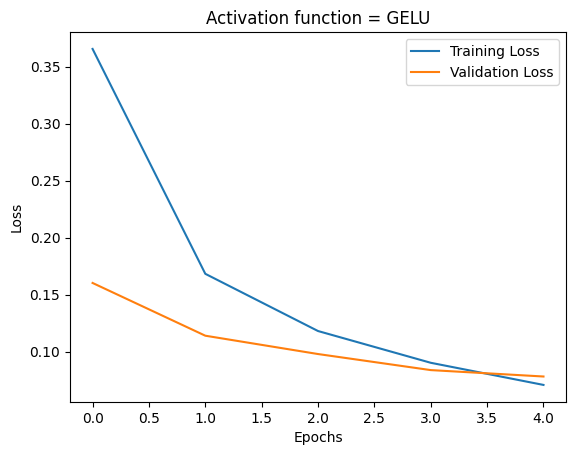

In [112]:
plt.plot(history_act3.history['loss'], label='Training Loss')
plt.plot(history_act3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Activation function = GELU")
plt.legend()
plt.show()

In [113]:
os.makedirs("results/task9_activations", exist_ok=True)

plt.plot(history_act3.history['val_loss'])
plt.savefig("results/task9_activations/GELU.png")
plt.close()


 ## 10)  Weight Inspection & Model Capacity Analysis

In [114]:
model_we=keras.models.clone_model(model)

In [115]:
model_we.compile(
    optimizer="Adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [116]:
history_we= model_we.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8767 - loss: 0.4371 - val_accuracy: 0.9670 - val_loss: 0.1179
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9653 - loss: 0.1221 - val_accuracy: 0.9742 - val_loss: 0.0952
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9755 - loss: 0.0824 - val_accuracy: 0.9778 - val_loss: 0.0820
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9823 - loss: 0.0618 - val_accuracy: 0.9762 - val_loss: 0.0845
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9872 - loss: 0.0418 - val_accuracy: 0.9776 - val_loss: 0.0869


In [117]:
w, b = model_we.layers[1].get_weights()
print(w.shape)

(784, 128)


In [162]:
os.makedirs("results/task10_weights", exist_ok=True)

w, b = model.layers[1].get_weights()
with open("results/task10_weights/weight_info.txt", "w") as f:
    f.write(f"Weights shape: {w.shape}\nBias shape: {b.shape}")
